# **‚≠ï PART 1. CNN Í∏∞Î∞ò Î≤†Ïù¥Ïä§Î™®Îç∏**

## **‚úÖ Step 1. Ïã§Ìóò ÌôòÍ≤Ω Set-up**     
     

In [137]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [138]:
# ÌïÑÏöîÌïú Î≥ÄÏàò ÏÉùÏÑ±
# Îç∞Ïù¥ÌÑ∞ Î°úÎìúÌï† Îïå Îπ†Î•¥Í≤å Î°úÎìúÌï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî ÏÑ§Ï†ï Î≥ÄÏàò
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥ÄÏàò - Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎäî Î™®Îì† Ïù¥ÎØ∏ÏßÄÎäî [180, 180] ÌÅ¨Í∏∞Î°ú Ï°∞Ï†ï
IMAGE_SIZE = [180, 180]

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú Î≥ÄÏàò
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')  # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•Îêú ÌîÑÎ°úÏ†ùÌä∏Ïùò Î£®Ìä∏ Í≤ΩÎ°ú
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*'  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏúÑÏπòÌïú Í≤ΩÎ°ú
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Í∞Ä ÏúÑÏπòÌïú Í≤ΩÎ°ú - ÌïôÏäµ ÎèÑÏ§ë Í≤ÄÏ¶ùÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Í≤ΩÎ°ú - ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú ÌõÑ ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞

# ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Îïå ÏïÑÎûò Îëê Î≥ÄÏàòÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî
BATCH_SIZE = 16
EPOCHS = 10

print(ROOT_PATH)

/aiffel/aiffel


## **‚úÖ Step 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞**

In [139]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)  # ÌïôÏäµÏóê ÏÇ¨Ïö©Îê† Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§Ïùò Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
test_filenames = tf.io.gfile.glob(TEST_PATH)  # ÌÖåÏä§Ìä∏Ïóê ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§Ïùò Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
val_filenames = tf.io.gfile.glob(VAL_PATH)  # Í≤ÄÏ¶ùÏóê ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§Ïùò Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏

# Í∞Å Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥ ÌôïÏù∏
print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


In [140]:
# train Îç∞Ïù¥ÌÑ∞ÏôÄ validation Îç∞Ïù¥ÌÑ∞Ïùò ÌååÏùº Í≤ΩÎ°úÎì§ÏùÑ Î™®Îëê filenamesÏóê Îã¥Í∏∞
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# Î™®ÏïÑÏßÑ filenamesÎ•º 8:2Î°ú ÎÇòÎàïÎãàÎã§
train_size = math.floor(len(filenames)*0.8)  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]  # Ïïû Î∂ÄÎ∂Ñ 80% Í≤ΩÎ°úÎì§ÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú
val_filenames = filenames[train_size:]  # ÎÇòÎ®∏ÏßÄ 20% Í≤ΩÎ°úÎì§ÏùÑ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú

print(len(train_filenames))  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎì§Ïù¥ Îã¥Í∏¥ Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥ ÌôïÏù∏ - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
print(len(val_filenames))  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎì§Ïù¥ Îã¥Í∏¥ Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥ ÌôïÏù∏ - Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò

4185
1047


In [141]:
print(f'Normal image path\n{filenames[0]}')  # filenames Î¶¨Ïä§Ìä∏Ïùò Ï≤´ Î≤àÏß∏ Ìï≠Î™©
print(f'Pneumonia image path\n{filenames[2000]}')  # filenames Î¶¨Ïä§Ìä∏Ïùò 2001Î≤àÏß∏ Ìï≠Î™©

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/IM-0450-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person1345_bacteria_3422.jpeg


In [142]:
# train_filenames Î¶¨Ïä§Ìä∏Ïùò Í≤ΩÎ°úÎì§ Ï§ë ÌååÏùº Ïù¥Î¶ÑÏóê Î¨∏ÏûêÏó¥ NORMALÏù¥ ÏûàÎäî Í≤ΩÏö∞ Ìï¥Îãπ ÌååÏùºÏùò Í≤ΩÎ°úÎì§Ïù¥ Ï∂îÏ∂úÎêòÏñ¥ Îã¥Í∏¥ Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

# train_filenames Î¶¨Ïä§Ìä∏Ïùò Í≤ΩÎ°úÎì§ Ï§ë ÌååÏùº Ïù¥Î¶ÑÏóê PNEUMONIAÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ Ìï¥Îãπ ÌååÏùºÏùò Í≤ΩÎ°úÎì§Ïù¥ Ï∂îÏ∂úÎêòÏñ¥ Îã¥Í∏¥ Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1070
Pneumonia images count in training set: 3115


In [143]:
# train_filenames Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Îêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌååÏùº Í≤ΩÎ°úÎì§ÏùÑ tf.data.Dataset ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°úÎì§Î°ú Íµ¨ÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ÏÖã Í∞ùÏ≤¥
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)

# val_filenames Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Îêú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÌååÏùº Í≤ΩÎ°úÎì§ÏùÑ tf.data.Dataset ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò - Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°úÎì§Î°ú Íµ¨ÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ÏÖã Í∞ùÏ≤¥
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [144]:
# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ìè¨Ìï®Îêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§Ïùò Ï¥ù Í∞úÏàò
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ìè¨Ìï®Îêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§Ïùò Ï¥ù Í∞úÏàò
VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [145]:
# ÌååÏùº Í≤ΩÎ°úÏùò ÎÅùÏóêÏÑú ÎëêÎ≤àÏß∏ Î∂ÄÎ∂ÑÏùÑ ÌôïÏù∏ÌïòÏó¨ ÏñëÏÑ±Í≥º ÏùåÏÑ± Íµ¨Î∂Ñ
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # ÌèêÎ†¥Ïù¥Î©¥ ÏñëÏÑ±(True), ÎÖ∏ÎßêÏù¥Î©¥ ÏùåÏÑ±(False)

In [146]:
# Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú Î∞îÍæ∏Í∏∞
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # Ïù¥ÎØ∏ÏßÄÎ•º uint8 tensorÎ°ú ÏàòÏ†ï
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 ÌÉÄÏûÖÏúºÎ°ú ÏàòÏ†ï
    img = tf.image.resize(img, IMAGE_SIZE) # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º IMAGE_SIZEÎ°ú ÏàòÏ†ï
    return img

# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º ÏûÖÎ†•ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥Ïò§Í∏∞
def process_path(file_path):
    label = get_label(file_path) # ÎùºÎ≤® Í≤ÄÏ∂ú
    img = tf.io.read_file(file_path) # Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
    img = decode_img(img) # Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú ÏàòÏ†ï
    return img, label

In [147]:
# train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º validation Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [148]:
# ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏôÄÏÑú ÌôïÏù∏
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


In [149]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Í∞úÏàò ÌôïÏù∏
print(TEST_IMAGE_COUNT)

624


## **‚úÖ Step 3. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî**

In [136]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑûÍ≥†, Î∞òÎ≥µÌïòÍ≥†, Î∞∞Ïπò Îã®ÏúÑÎ°ú Î¨∂Ïñ¥ Î™®Îç∏ ÌïôÏäµÏóê ÏµúÏ†ÅÌôîÎêú ÌòïÌÉúÎ°ú Ï§ÄÎπÑ
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïù¥ Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨, Ìö®Ïú®Ï†ÅÏù∏ ÌïôÏäµÍ≥º Í≤ÄÏ¶ùÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏûêÎèôÌôî
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

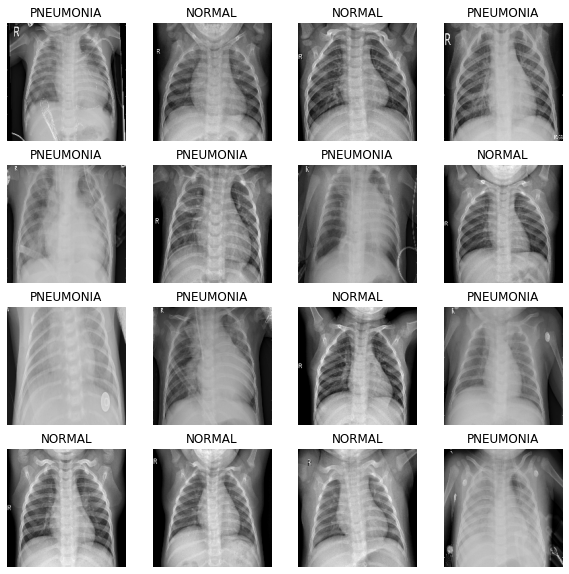

In [16]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏûÖÎ†•ÌïòÏó¨ Ïó¨Îü¨ Ïû•Ïùò Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())  # train Îç∞Ïù¥ÌÑ∞ Ï§ë Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÎ•º imageÏôÄ label Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàÑÏñ¥ Í≤∞Í≥º ÌëúÏãú

## **‚úÖ Step 4. CNN Î™®Îç∏ÎßÅ**

In [17]:
# Convolution block
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),  # Ï≤´ Î≤àÏß∏ convolution
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),  # Îëê Î≤àÏß∏ convolution
        tf.keras.layers.BatchNormalization(),  # Gradient vanishing, Gradient Explding Ìï¥Í≤∞
        tf.keras.layers.MaxPool2D()  # Max Pooling
    ])

    return block

In [18]:
# Dense block
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

In [19]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model


model = build_model()
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
sequential (Sequential)      (None, 45, 45, 32)        2160      
_________________________________________________________________
sequential_1 (Sequential)    (None, 22, 22, 64)        7392      
_________________________________________________________________
sequential_2 (Sequential)    (None, 11, 11, 128)       27072     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)      

## **‚úÖ Step 5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨**

In [20]:
# Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
# weightÎì§ÏùÄ NormalÍ≥º Pneumonia Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í±¥ÏàòÏóê Î∞òÎπÑÎ°Ä
# ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞ ÏàòÏóê Îî∞Îùº Í∞ÄÏ§ëÏπòÎ•º Ï°∞Ï†ïÌïòÏó¨ Î™®Îç∏Ïù¥ Í∞Å ÌÅ¥ÎûòÏä§Ïùò Î∂àÍ∑†ÌòïÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≥†, ÌäπÌûà ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º Îçî Ïûò Ïù∏ÏãùÌïòÎèÑÎ°ù ÌïôÏäµÌïòÎèÑÎ°ù ÎèïÎäîÎã§Îäî Í≤É
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


## **‚úÖ Step 6. Î™®Îç∏ ÌõàÎ†®**

In [21]:
METRICS = [  # accuracy, precision, recall
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Ïù¥ÎØ∏ÏßÄ ÎùºÎ≤®Ïù¥ 2Í∞ú Î∞ñÏóê ÏóÜÏùå
    metrics=METRICS
)

In [22]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10
261/261 [==============================] - 69s 211ms/step - loss: 0.3867 - accuracy: 0.8113 - precision: 0.9563 - recall: 0.7821 - val_loss: 0.6928 - val_accuracy: 0.7365 - val_precision: 0.7365 - val_recall: 1.0000
Epoch 2/10
261/261 [==============================] - 54s 209ms/step - loss: 0.2296 - accuracy: 0.9064 - precision: 0.9719 - recall: 0.9003 - val_loss: 1.1819 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 3/10
261/261 [==============================] - 54s 209ms/step - loss: 0.1925 - accuracy: 0.9296 - precision: 0.9773 - recall: 0.9270 - val_loss: 0.5902 - val_accuracy: 0.7702 - val_precision: 0.7612 - val_recall: 1.0000
Epoch 4/10
261/261 [==============================] - 55s 211ms/step - loss: 0.2034 - accuracy: 0.9241 - precision: 0.9761 - recall: 0.9205 - val_loss: 0.9853 - val_accuracy: 0.6952 - val_precision: 1.0000 - val_recall: 0.5851
Epoch 5/10
261/261 [==============================] - 56s 216ms/step - loss: 0.1610 - accura

## **‚úÖ Step 7. Í≤∞Í≥º ÌôïÏù∏Í≥º ÏãúÍ∞ÅÌôî**

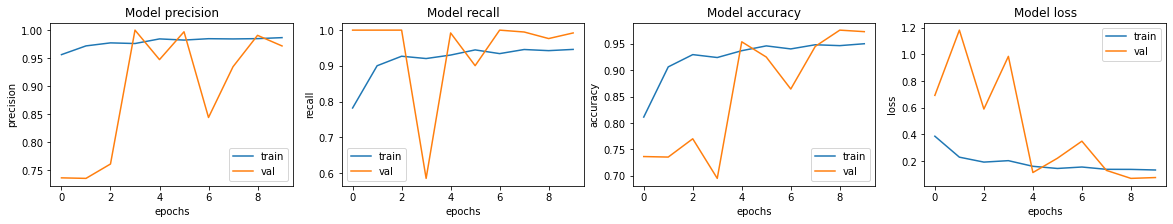

In [23]:
# epochÎßàÎã§ Î™®Îç∏Ïùò precision, recall, accuracy, loss Î≥ÄÌôî ÌëúÏãú
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [24]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌèâÍ∞Ä
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 5s 129ms/step - loss: 0.8943 - accuracy: 0.7308 - precision: 0.6996 - recall: 0.9974
Loss: 0.8942579627037048,
Accuracy: 0.7307692170143127,
Precision: 0.6996402740478516,
Recall: 0.9974358677864075


# **‚≠ï PART 2. Augmentation**

## **‚úÖ Step 1. Ïã§Ìóò ÌôòÍ≤Ω Set-up**     
     
- Batch size, Epoch Îì± Î≥ÄÍ≤Ω ÏãúÎèÑ

In [150]:
BATCH_SIZE = 32  # ÌïÑÏöîÏóê Îî∞Îùº Î≥ÄÍ≤Ω Í∞ÄÎä•
EPOCHS = 20      # ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï Í∞ÄÎä•

# ÎÇòÎ®∏ÏßÄ Í∏∞Î≥∏ ÏÑ§Ï†ï
AUTOTUNE = tf.data.experimental.AUTOTUNE # Now tf is defined and can be used

## **‚úÖ Step 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞**     
       
- ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄÏÑú Ï†ÑÏ≤òÎ¶¨ Î∞è Î∞∞Ïπò Íµ¨ÏÑ± ÏßÑÌñâ
- Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
    - ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò ÎòêÎäî Ïò§Î≤ÑÏÉòÌîåÎßÅ     
- ÏùòÎ£å ÏòÅÏÉÅ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Î∂àÏ∂©Î∂Ñ Í∑πÎ≥µ Î∞©Î≤ï
    - augmentation: Ï¢åÏö∞ Î∞òÏ†ÑÍ≥º ÏïΩÍ∞ÑÏùò ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä, ÌöåÏ†Ñ Îì±
    
    
   üõë ÏùòÎ£å ÏòÅÏÉÅÏù∏ Í≤ΩÏö∞, ÏùºÎ∞òÏ†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî augmentationÎì§Ïù¥ Ìï≠ÏÉÅ ÎèÑÏõÄÏù¥ ÎêúÎã§Í≥† ÎßêÌï† Ïàò ÏóÜÎã§. ÌäπÌûà X-RAY Í∞ôÏùÄ ÏùòÎ£å ÏòÅÏÉÅÏùò ÌäπÏÑ±ÏÉÅ, Ïú°ÏïàÏúºÎ°úÎèÑ Íµ¨Î∂ÑÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÎØ∏Î¨òÌïú Ï∞®Ïù¥Ïóê ÎçîÌï¥ÏßÑ ÎÖ∏Ïù¥Ï¶à Îì± Î∂ÄÏàòÌö®Í≥ºÍ∞Ä Ïò§ÌûàÎ†§ Î∞©Ìï¥Î•º Ï§Ñ ÏàòÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.



In [151]:
# Augmentation Ìï®Ïàò
def augment(image, label):
    image = tf.image.random_flip_left_right(image)  # Ï¢åÏö∞ Î∞òÏ†Ñ
    #image = tf.image.random_flip_up_down(image)  # ÏÉÅÌïò Î∞òÏ†Ñ
    image = tf.image.random_brightness(image, max_delta=0.1)  # Î∞ùÍ∏∞ Ï°∞Ï†à
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # ÎåÄÎπÑ Ï°∞Ï†à
    return image, label

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Ìï®Ïàò (augmentation Ìè¨Ìï®)
def prepare_for_training(ds, augment_fn=None, shuffle_buffer_size=1000):
    if augment_fn:  # Augmentation Ìï®ÏàòÍ∞Ä Ï£ºÏñ¥Ï°åÏùÑ ÎïåÎßå Ï†ÅÏö©
        ds = ds.map(augment_fn, num_parallel_calls=AUTOTUNE)
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# Augmentation Ï†ÅÏö©Îêú train dataset
train_ds_augmented = prepare_for_training(train_ds, augment_fn=augment)
# Augmentation ÎØ∏Ï†ÅÏö©Îêú Î≤†Ïù¥Ïä§ÎùºÏù∏ train dataset
train_ds_baseline = prepare_for_training(train_ds)
# validation Îç∞Ïù¥ÌÑ∞Îäî augmentation Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùå
val_ds = prepare_for_training(val_ds)


In [152]:
# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∞∞Ïπò ÌÅ¨Í∏∞ ÌôïÏù∏
train_ds_augmented_batch = next(iter(train_ds_augmented))
train_ds_baseline_batch = next(iter(train_ds_baseline))

print(f"Augmented batch shape: {train_ds_augmented_batch[0].shape}")
print(f"Baseline batch shape: {train_ds_baseline_batch[0].shape}")


Augmented batch shape: (32, 180, 180, 3)
Baseline batch shape: (32, 180, 180, 3)


## **‚úÖ Step 3. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî**      
          
- ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Î∞è ÌôïÏù∏
- augmentationÏùÑ ÏãúÎèÑÌïú Í≤ΩÏö∞, show_batch() Ìï®ÏàòÎ•º ÌÜµÌï¥ Ï¢åÏö∞ Î∞òÏ†Ñ Ï≤òÎ¶¨ ÌôïÏù∏


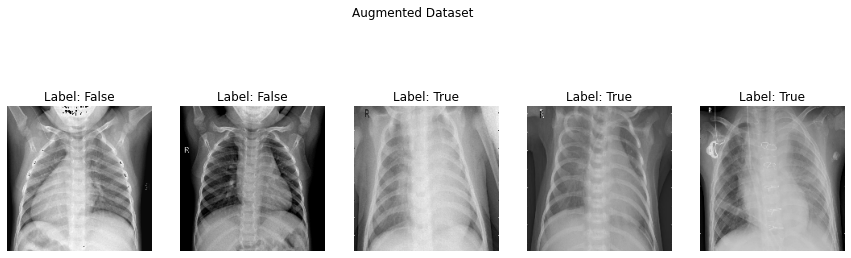

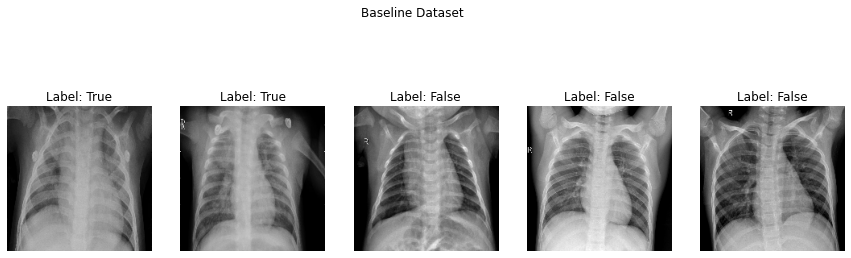

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf

# AugmentationÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎØ∏Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÎ•º Í∞ÄÏ†∏Ïò¥
train_ds_augmented_batch = next(iter(train_ds_augmented))
train_ds_baseline_batch = next(iter(train_ds_baseline))

def visualize_dataset(dataset_batch, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, (image, label) in enumerate(zip(dataset_batch[0], dataset_batch[1])):
        if i >= num_images:  # ÏãúÍ∞ÅÌôîÌï† Ïù¥ÎØ∏ÏßÄ Ïàò Ï†úÌïú
            break
        # Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º [0, 1]ÏóêÏÑú [0, 255]Î°ú Î≥ÄÌôòÌïòÍ≥† uint8Î°ú Ï∫êÏä§ÌåÖ
        image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.numpy())  # numpyÎ°ú Î≥ÄÌôò ÌõÑ ÏãúÍ∞ÅÌôî
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

print()
# AugmentationÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖã ÏãúÍ∞ÅÌôî
visualize_dataset(train_ds_augmented_batch, "Augmented Dataset")
print()
print()
# AugmentationÏù¥ Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏãúÍ∞ÅÌôî
visualize_dataset(train_ds_baseline_batch, "Baseline Dataset")


*- AugmentationÏù¥ Ï†ÅÏö©Îêú Ïù¥ÎØ∏ÏßÄÎäî ÏõêÎ≥∏Í≥º ÎπÑÍµêÌñàÏùÑ Îïå Ï¢åÏö∞ Î∞òÏ†Ñ, Î∞ùÍ∏∞ Î∞è ÎåÄÎπÑ Ï°∞Ï†à Îì±Ïùò Î≥ÄÌôîÍ∞Ä Î≥¥Ïù∏Îã§.*  
*- Î∞òÎ©¥, Î≤†Ïù¥Ïä§ÎùºÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Í∑∏ÎåÄÎ°ú ÏãúÍ∞ÅÌôîÎê©ÎãàÎã§.*     
*- AugmentationÏù¥ Îß§Î≤à ÎûúÎç§ÌïòÍ≤å Ï†ÅÏö©ÎêòÏñ¥ Ïã§ÌñâÌï† ÎïåÎßàÎã§ Îã§Î•∏ Î≥ÄÌòïÎêú Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï∂úÎ†•ÎêòÏñ¥ ÌôïÏù∏ÎêúÎã§.*     
*- AugmentationÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖã (train_ds_augmented)ÏóêÏÑú Ï¢åÏö∞ Î∞òÏ†Ñ, Î∞ùÍ∏∞ Ï°∞Ï†à Îì±Ïùò AugmentationÏù¥ Ï†ÅÏö©Îêú Í≤∞Í≥ºÎ•º ÏßÅÏ†ë ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.*   

# **‚≠ï PART 3. ResNet-18 Î™®Îç∏ Íµ¨ÌòÑ**

## **‚úÖ Step 4. ResNet-18 Íµ¨ÌòÑ - A**        
          
- Residual ConnectionÏúºÎ°ú ÌïôÏäµÎêú Ï†ïÎ≥¥Í∞Ä Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Í≥ºÏ†ïÏóêÏÑú ÏÜêÏã§ÎêòÎäî Í≤ÉÏùÑ Î∞©ÏßÄ      
- ResNetÏùò Residual ConnectionÏùÄ Ïù¥ÌõÑÏóê ÎÇòÏò§Îäî TransformerÏôÄ Í∞ôÏùÄ Î™®Îç∏ÏóêÎèÑ ÏÇ¨Ïö©


                  
### **(1) Residual block Íµ¨ÏÑ±**       
          
- ResNetÏùò Ï£ºÏöî Íµ¨ÏÑ± ÏöîÏÜå: ÏûÖÎ†•Í∞íÏùÑ Í∑∏ÎåÄÎ°ú ÎçîÌïòÎäî skip connectionÏùÑ Ìè¨Ìï®Ìïú Íµ¨Ï°∞     
     
     
             


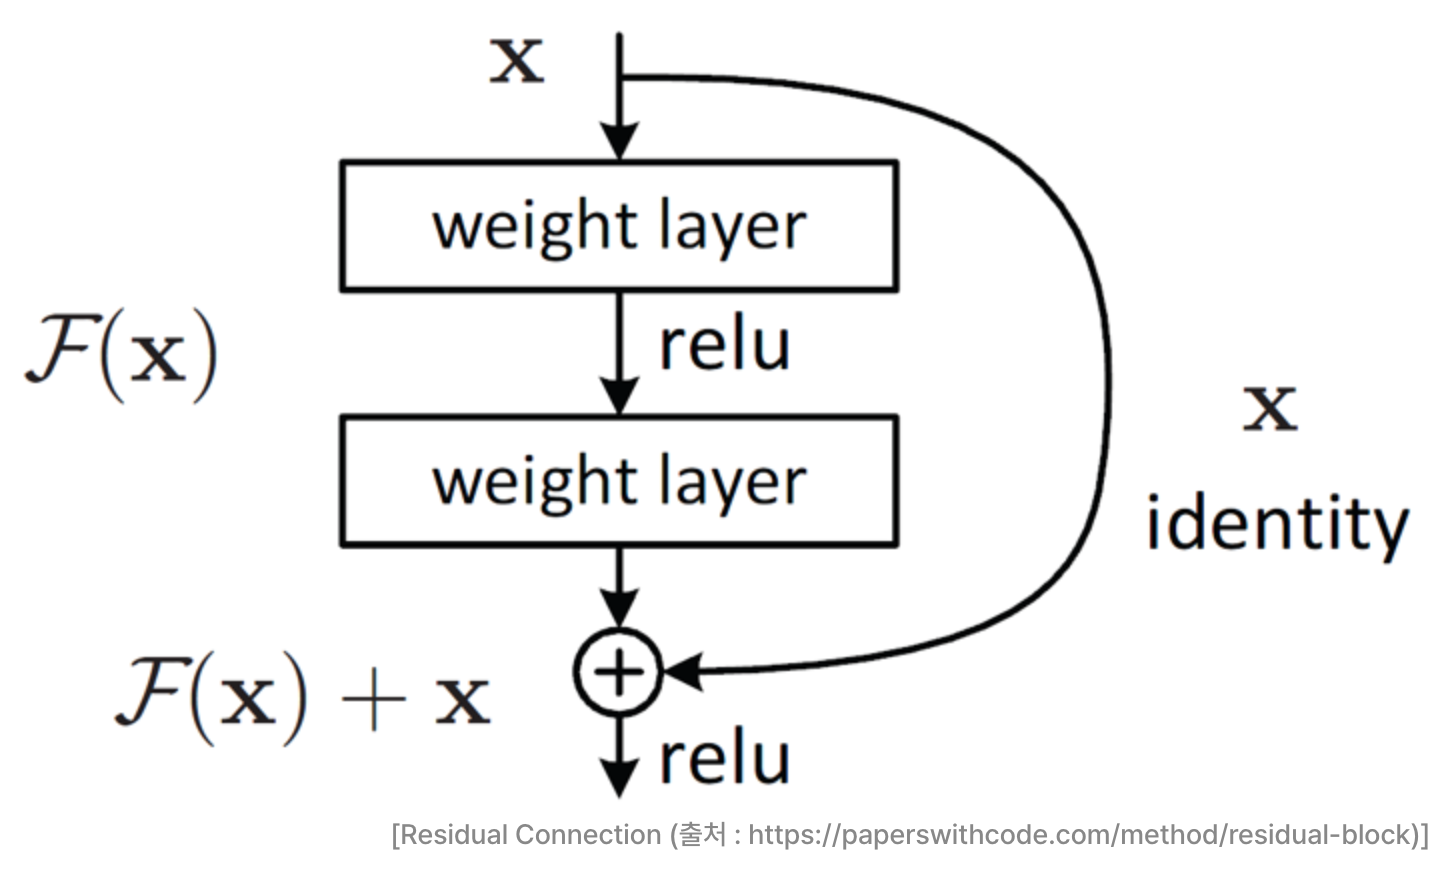

weight layer
- 3 x 3 CNN
- BatchNormalization
- ÌôúÏÑ±Ìôî Ìï®Ïàò ReLU

### **(2) ResNet Íµ¨ÌòÑ**       
                       
                            
- Ìï¥Îãπ tableÏùÄ ImageNet ChallengeÎ•º Í∞ÄÏ†ïÌñàÍ∏∞ ÎïåÎ¨∏Ïóê filterÍ∞úÏàòÎäî ÌäúÎãùÌïòÎ©¥ÏÑú Î≥ÄÍ≤Ω     
- ResNet-18ÏùÄ Ïù¥ residual blockÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±          
- ÏïÑÎûò ÏΩîÎìúÎäî 18Ï∏µ Î†àÏù¥Ïñ¥     
     

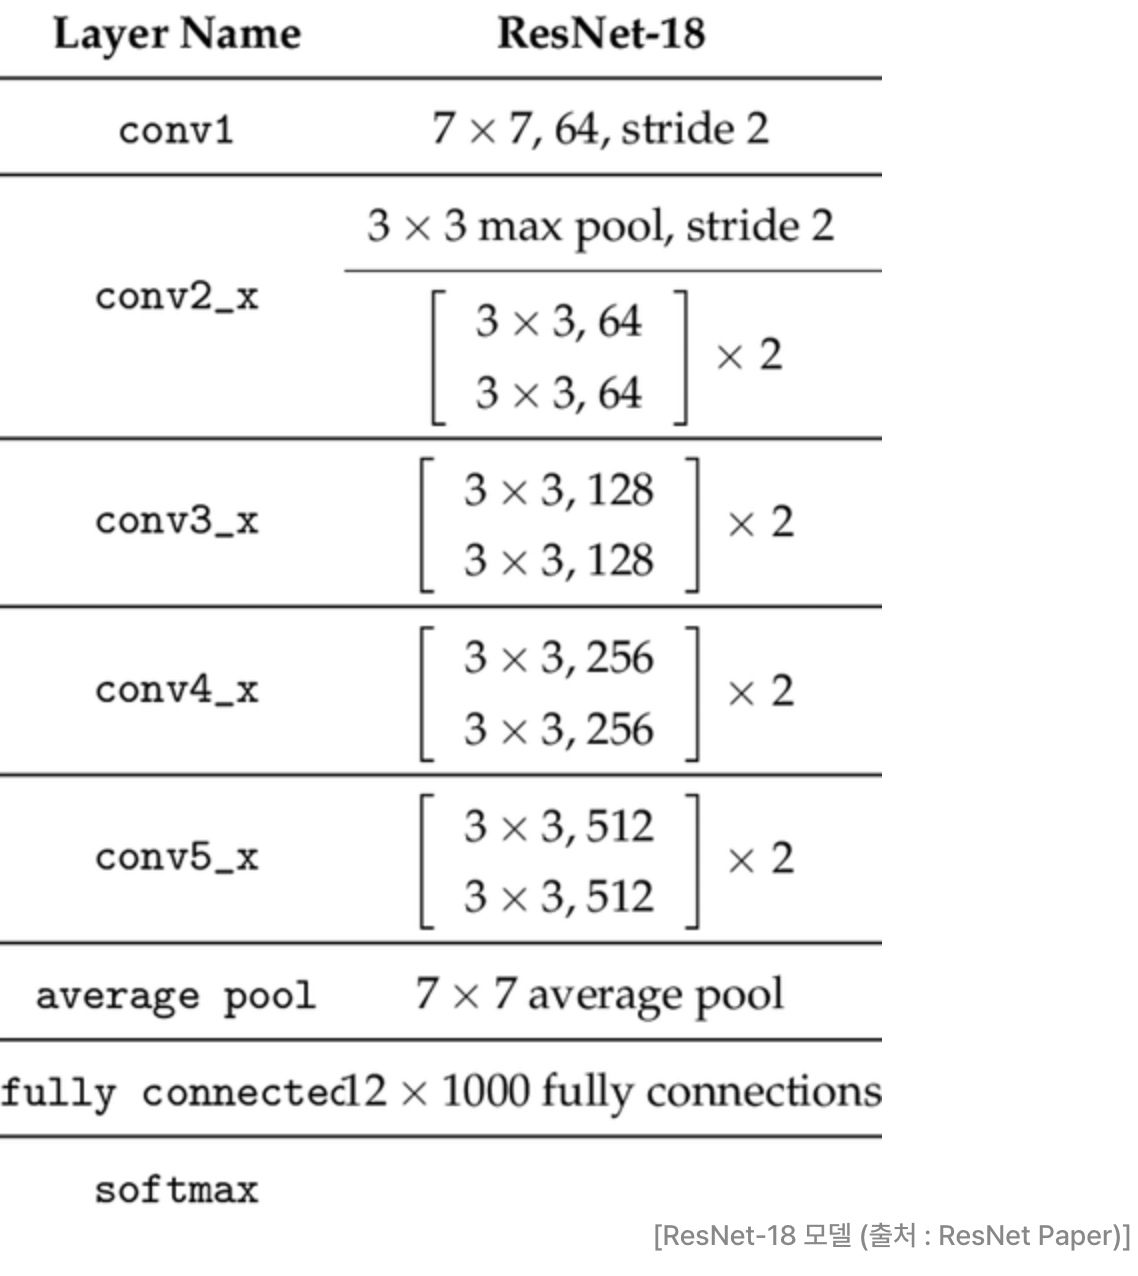

Ïö∞Î¶¨Í∞Ä ÎßåÎì§ CNN Î™®Îç∏ÏùÄ ÏïΩÍ∞ÑÏùò ÏàòÏ†ïÏùÑ Í±∞Ï≥ê ÎßåÎì§Ïñ¥ÏßÑ Î™®Îç∏ÏûÖÎãàÎã§. Ï†ÑÌòïÏ†ÅÏù∏ CNN Î™®Îç∏Í≥ºÎäî ÏïΩÍ∞Ñ Îã§Î•∏ Î™®Îç∏ÏûÖÎãàÎã§.

Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏù¥ Í∞ÄÏû• ÌäπÏù¥ÌïúÍ∞ÄÏöî?    
Îëê Í∞ÄÏßÄ regularization Í∏∞Î≤ï   
- Batch Normalization      
- Dropout

üî¥ ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïù¥Îü∞ Î∞©Î≤ïÏùÄ Ïûò ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÍ±∞ÎÇò, Í∏àÍ∏∞ÏãúÎêòÍ∏∞ÎèÑ Ìï©ÎãàÎã§. ÎåÄÌëúÏ†ÅÏúºÎ°ú ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÎÖºÎ¨∏Ïùò ÏÇ¨Î°ÄÎ•º Îì§ Ïàò ÏûàÏäµÎãàÎã§.

*Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift*     
     
ÏúÑ ÎÖºÎ¨∏ÏóêÏÑúÎäî variance shiftÎ•º ÏñµÏ†úÌïòÎäî Batch NormalizationÍ≥º Ïù¥Î•º Ïú†Î∞úÌïòÎäî DropoutÏùÑ ÎèôÏãúÏóê ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ïñ¥Ïö∏Î¶¨ÏßÄ ÏïäÎäîÎã§Í≥† Î∞ùÌûàÍ≥† ÏûàÏäµÎãàÎã§.

Í∑∏Îü¨ÎÇò, Ïã§Ïö©Ï†ÅÏúºÎ°úÎäî Îëê Î∞©Î≤ïÏùÑ Í∞ôÏù¥ Ïì∞Îäî Í≤ÉÏù¥ ÎÇ´Îã§Í≥† Î≥¥Îäî Í≤¨Ìï¥ÎèÑ ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãôÎãàÎã§. ÏòàÏô∏Ï†ÅÏúºÎ°ú ÎèôÏãúÏóê ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏùÑ Ï£ºÎäî Í≤ΩÏö∞Í∞Ä Ïã§Ï†úÎ°ú ÏûàÏäµÎãàÎã§. ÏïÑÎûò ÎÖºÎ¨∏Í≥º Í∞ôÏù¥ Îëê Î∞©Î≤ïÏùÑ Í∞ôÏù¥ Ïì∞Îäî Í≤ÉÏùÑ ÏòπÌò∏ÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§.     
     
*Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks*     
     
Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî Îëê Í∞ÄÏßÄÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïòÎäî Ïù¥ Î™®Îç∏Ïù¥ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê†ÏßÄ Ïó¨Î∂ÄÎèÑ Ìù•ÎØ∏Î°≠Í≤å ÏÇ¥Ìé¥Î≥ºÎßå Ìïú Î∂ÄÎ∂ÑÏûÖÎãàÎã§.






In [114]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
# Import the optimizers module
from tensorflow.keras import optimizers

# Residual Block Ï†ïÏùò
def residual_block(x, filters, downsample=False):
    identity = x

    if downsample:
        x = Conv2D(filters, (3, 3), strides=(2, 2), padding="same")(x)
        identity = Conv2D(filters, (1, 1), strides=(2, 2), padding="same")(identity)
    else:
        x = Conv2D(filters, (3, 3), strides=(1, 1), padding="same")(x)

    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (3, 3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, identity])
    x = ReLU()(x)

    return x

# ResNet-18 Íµ¨ÌòÑ
def build_resnet18(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, downsample=True)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

# Î™®Îç∏ ÏÉùÏÑ±
input_shape = (180, 180, 3)
model = build_resnet18(input_shape)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 90, 90, 64)   9472        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_57 (BatchNo (None, 90, 90, 64)   256         conv2d_60[0][0]                  
__________________________________________________________________________________________________
re_lu_35 (ReLU)                 (None, 90, 90, 64)   0           batch_normalization_57[0][0]     
____________________________________________________________________________________________

## **‚úÖ Step 5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨**     
     
     
- Îç∞Ïù¥ÌÑ∞Ïùò imbalance Î¨∏Ï†úÏóê ÎåÄÏ≤òÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®Î°ú ÎÇòÎàÑÏñ¥ÏßÑ class_weightÎ•º ÏÑ§Ï†ï     
     
     
‚úã ÎßåÏïΩ Ïù¥Îü¨Ìïú Ï≤òÎ¶¨Î•º ÏÉùÎûµÌïúÎã§Î©¥ Ïñ¥ÎñªÍ≤å Îê†ÍπåÏöî?     
‚úã recallÏùÑ Í∞ïÏ°∞ÌïòÍ∏∞ ÏúÑÌï¥ ÌèêÎ†¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÎßûÏ∂îÎäî Í≤ÉÏùÑ Îçî Í∞ïÌôîÌïòÎäî Ìö®Í≥ºÎ•º ÎßåÎì§Ïñ¥ÎÇº ÏàòÎäî ÏóÜÏùÑÍπåÏöî?

     

- Ìïú ÎùºÎ≤®Ïù¥ ÎÑàÎ¨¥ ÎßéÏùÄ Í≤ΩÏö∞     
- Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌï† Îïå ÌïôÏäµ Ìö®Í≥ºÍ∞Ä Ï¢ãÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå      
     

-- Weight balancing: training setÏùò Í∞Å Îç∞Ïù¥ÌÑ∞ÏóêÏÑú lossÎ•º Í≥ÑÏÇ∞Ìï† Îïå ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Ïóê Îçî ÌÅ∞ loss Í∞íÏùÑ Í∞ñÎèÑÎ°ù Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Î∞©Î≤ï     
-- KerasÎäî model.fit()ÏùÑ Ìò∏Ï∂úÌï† Îïå ÌååÎùºÎØ∏ÌÑ∞Î°ú ÎÑòÍ∏∞Îäî class_weight Ïóê Ïù¥Îü¨Ìïú ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπòÎ•º ÏÑ∏ÌåÖÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõê



ü§ö *Î®ºÏ†Ä, Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º Í≥ÑÏÇ∞Ìï¥Ïïº Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, ÌèêÎ†¥(Pneumonia)Í≥º Ï†ïÏÉÅ(Normal) Îç∞Ïù¥ÌÑ∞Î•º Í∞ÅÍ∞Å ÏÑ∏Îäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.*

In [115]:
import numpy as np

# Í∞Å ÌÅ¥ÎûòÏä§ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò ÏÑ∏Í∏∞
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])

# Í∞Å ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®
total_images = COUNT_NORMAL + COUNT_PNEUMONIA
normal_weight = total_images / (2 * COUNT_NORMAL)
pneumonia_weight = total_images / (2 * COUNT_PNEUMONIA)

# class_weight ÎîïÏÖîÎÑàÎ¶¨ ÏÑ§Ï†ï
class_weight = {0: normal_weight, 1: pneumonia_weight}

print(f"Class weights: {class_weight}")


Class weights: {0: 1.9519589552238805, 1: 0.6721811757147447}


ü§ö *class_weightÎäî model.fit() Ìï®ÏàòÏóêÏÑú ÏÇ¨Ïö©Îê©ÎãàÎã§. class_weightÎäî ÌÅ¥ÎûòÏä§Ïùò Ïù∏Îç±Ïä§(Î†àÏù¥Î∏î)ÏôÄ Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò Í∞ÄÏ§ëÏπòÎ•º Îß§ÌïëÌïú ÎîïÏÖîÎÑàÎ¶¨Î°ú, Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê Îçî ÌÅ∞ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.*

## **‚úÖ Step 6. Î™®Îç∏ ÌõàÎ†®**           
          
          
- loss Ìï®ÏàòÎ•º Î≥ÄÍ≤ΩÌïòÍ∏∞Îäî Ïñ¥Î†µÍ≤†ÏßÄÎßå, optimizerÎÇò learning rate Îì±Ïùò Î≥ÄÌôîÎ•º Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É
- Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† Îïå, class_weightÍ≥º EarlyStoppingÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ      

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping ÏÑ§Ï†ï
early_stopping = EarlyStopping(
                        monitor='val_loss',  # Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Î™®ÎãàÌÑ∞ÎßÅ
                        patience=5,          # Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ 5 epoch ÌõÑ Ï§ëÎã®
                        restore_best_weights=True  # Í∞ÄÏû• Ï¢ãÏùÄ Í∞ÄÏ§ëÏπò Î≥µÏõê
)  

In [117]:
METRICS = [  # accuracy, precision, recall
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
    
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Ïù¥ÎØ∏ÏßÄ ÎùºÎ≤®Ïù¥ 2Í∞ú Î∞ñÏóê ÏóÜÏùå
    metrics=METRICS
)

In [118]:
# ÌõàÎ†® Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ ÏÑ§Ï†ï
train_steps_per_epoch = len(train_filenames) // BATCH_SIZE  
val_steps = len(val_filenames) // BATCH_SIZE  

# Î™®Îç∏ ÌõàÎ†®
history = model.fit(
    train_ds_augmented,
    epochs=10,
    validation_data=val_ds,
    steps_per_epoch=train_steps_per_epoch,  # ÏóêÌè¨ÌÅ¨ Îãπ Ïä§ÌÖù Ïàò ÏÑ§Ï†ï
    validation_steps=val_steps,  # Í≤ÄÏ¶ù Ïä§ÌÖù Ïàò ÏÑ§Ï†ï
    callbacks=[early_stopping],  # EarlyStopping Ï∂îÍ∞Ä
    class_weight=class_weight  # Class weight Ï∂îÍ∞Ä
)


Epoch 1/10
130/130 [==============================] - 64s 414ms/step - loss: 0.4208 - accuracy: 0.8365 - precision: 0.9427 - recall: 0.8305 - val_loss: 8.8329 - val_accuracy: 0.3320 - val_precision: 0.9857 - val_recall: 0.0918
Epoch 2/10
130/130 [==============================] - 54s 414ms/step - loss: 0.2331 - accuracy: 0.9075 - precision: 0.9709 - recall: 0.9029 - val_loss: 4.2907 - val_accuracy: 0.2910 - val_precision: 1.0000 - val_recall: 0.0371
Epoch 3/10
130/130 [==============================] - 54s 417ms/step - loss: 0.1961 - accuracy: 0.9286 - precision: 0.9784 - recall: 0.9244 - val_loss: 0.9607 - val_accuracy: 0.7461 - val_precision: 0.7438 - val_recall: 0.9973
Epoch 4/10
130/130 [==============================] - 55s 422ms/step - loss: 0.1884 - accuracy: 0.9267 - precision: 0.9732 - recall: 0.9270 - val_loss: 0.8037 - val_accuracy: 0.7383 - val_precision: 0.7383 - val_recall: 1.0000
Epoch 5/10
130/130 [==============================] - 57s 437ms/step - loss: 0.1431 - accura

## **‚úÖ Step 7. Í≤∞Í≥º ÌôïÏù∏Í≥º ÏãúÍ∞ÅÌôî**          
          
            
- ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®Îêú Î™®Îç∏ÏùÑ ÌèâÍ∞Ä          
- Ïö∞ÏÑ†ÏùÄ accuracyÎ•º Í≥†Î†§Ìï¥ÏïºÍ≤†ÏßÄÎßå ÏùòÎ£å ÏòÅÏÉÅ Î™®Îç∏Ïùò ÌäπÏÑ±ÏÉÅ recallÎèÑ Ï§ëÏöî          
          
### **(1) ÌõàÎ†®Í≥ºÏ†ïÏùò history Í∑∏ÎûòÌîÑÎ•º ÏãúÍ∞ÅÌôî**          
          


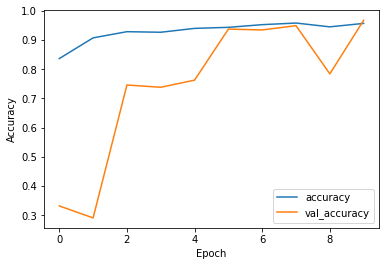

In [119]:
# ÌïôÏäµ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

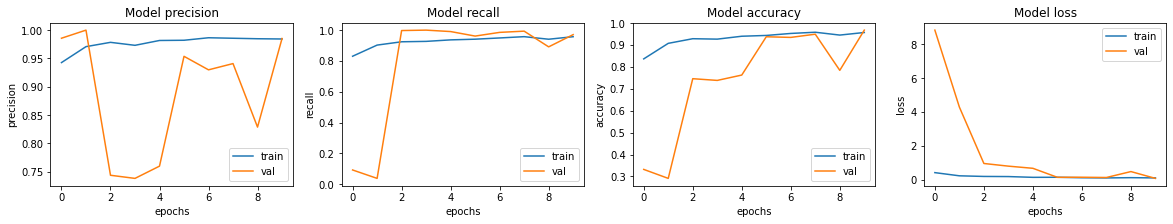

In [120]:
# epochÎßàÎã§ Î™®Îç∏Ïùò precision, recall, accuracy, loss Î≥ÄÌôî ÌëúÏãú
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

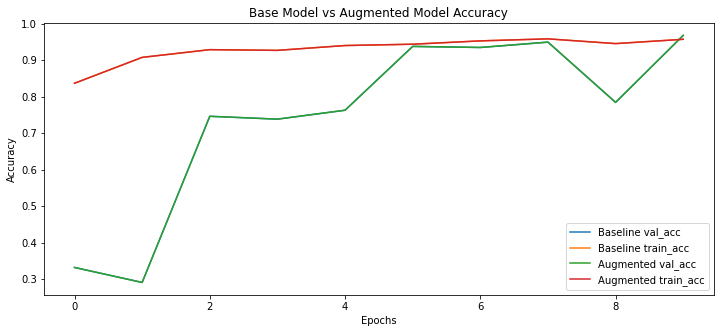

In [121]:
# Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_history(histories, title):
    plt.figure(figsize=(12, 5))
    for name, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'{name} val_acc')
        plt.plot(history.history['accuracy'], label=f'{name} train_acc')
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Assuming 'history' is the variable holding the training history of your baseline model
history_base = history  # Assign the baseline model's history
history_augmented = history  # Assign the augmented model's history

# Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏Í≥º Augmentation Î™®Îç∏ ÎπÑÍµê
plot_history([('Baseline', history_base), ('Augmented', history_augmented)], 
             'Base Model vs Augmented Model Accuracy')

### **(2) ÌïôÏäµ ÏßÑÌñâ ÏñëÏÉÅÏùÑ Î©¥Î∞ÄÌûà Î∂ÑÏÑù**

In [122]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌèâÍ∞Ä
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 5s 112ms/step - loss: 0.6574 - accuracy: 0.8029 - precision: 0.7665 - recall: 0.9846
Loss: 0.6573859453201294,
Accuracy: 0.8028846383094788,
Precision: 0.7664670944213867,
Recall: 0.9846153855323792


# **‚≠ï PART 4. Íµ¨Ï°∞ Î≥ÄÍ≤Ω**

## **‚úÖ Step 4. ResNet-18 Íµ¨ÌòÑ - B**        

In [153]:
class ResidualBlock(tf.keras.Model):
    def __init__(self, filters, strides=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, 3, strides=strides, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, 3, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.downsample = None
        if strides != 1:
            self.downsample = tf.keras.Sequential([
                tf.keras.layers.Conv2D(filters, 1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ])

    def call(self, x):
        residual = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        if self.downsample:
            residual = self.downsample(residual)
        x += residual
        return self.relu(x)

def build_resnet18(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    filters = [64, 128, 256, 512]
    for i, f in enumerate(filters):
        strides = 1 if i == 0 else 2
        x = ResidualBlock(f, strides=strides)(x)
        x = ResidualBlock(f)(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

model = build_resnet18(input_shape=(180, 180, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## **‚úÖ Step 5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨**     

In [154]:
import numpy as np

# Í∞Å ÌÅ¥ÎûòÏä§ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò ÏÑ∏Í∏∞
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])

# Í∞Å ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®
total_images = COUNT_NORMAL + COUNT_PNEUMONIA
normal_weight = total_images / (2 * COUNT_NORMAL)
pneumonia_weight = total_images / (2 * COUNT_PNEUMONIA)

# class_weight ÎîïÏÖîÎÑàÎ¶¨ ÏÑ§Ï†ï
class_weight = {0: normal_weight, 1: pneumonia_weight}

print(f"Class weights: {class_weight}")

Class weights: {0: 1.955607476635514, 1: 0.6717495987158909}


## **‚úÖ Step 6. Î™®Îç∏ ÌõàÎ†®**   

In [155]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping ÏÑ§Ï†ï
early_stopping = EarlyStopping(
                        monitor='val_loss',  # Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Î™®ÎãàÌÑ∞ÎßÅ
                        patience=5,          # Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ 5 epoch ÌõÑ Ï§ëÎã®
                        restore_best_weights=True  # Í∞ÄÏû• Ï¢ãÏùÄ Í∞ÄÏ§ëÏπò Î≥µÏõê
)  

METRICS = [  # accuracy, precision, recall
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
 
# Î™®Îç∏ Ïª¥ÌååÏùº 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Ïù¥ÎØ∏ÏßÄ ÎùºÎ≤®Ïù¥ 2Í∞ú Î∞ñÏóê ÏóÜÏùå
    metrics=METRICS
)

# ÌõàÎ†® Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ ÏÑ§Ï†ï
train_steps_per_epoch = len(train_filenames) // BATCH_SIZE  
val_steps = len(val_filenames) // BATCH_SIZE  

# Î™®Îç∏ ÌõàÎ†®
history = model.fit(
    train_ds_augmented,
    epochs=10,
    validation_data=val_ds,
    steps_per_epoch=train_steps_per_epoch,  # ÏóêÌè¨ÌÅ¨ Îãπ Ïä§ÌÖù Ïàò ÏÑ§Ï†ï
    validation_steps=val_steps,  # Í≤ÄÏ¶ù Ïä§ÌÖù Ïàò ÏÑ§Ï†ï
    callbacks=[early_stopping],  # EarlyStopping Ï∂îÍ∞Ä
    class_weight=class_weight  # Class weight Ï∂îÍ∞Ä
)

Epoch 1/10
130/130 [==============================] - 59s 386ms/step - loss: 0.3091 - accuracy: 0.8918 - precision: 0.9590 - recall: 0.8927 - val_loss: 2.8200 - val_accuracy: 0.7314 - val_precision: 0.7314 - val_recall: 1.0000
Epoch 2/10
130/130 [==============================] - 51s 396ms/step - loss: 0.1800 - accuracy: 0.9286 - precision: 0.9782 - recall: 0.9249 - val_loss: 1.9541 - val_accuracy: 0.7295 - val_precision: 0.7295 - val_recall: 1.0000
Epoch 3/10
130/130 [==============================] - 52s 402ms/step - loss: 0.1332 - accuracy: 0.9450 - precision: 0.9834 - recall: 0.9417 - val_loss: 0.2713 - val_accuracy: 0.8848 - val_precision: 0.8723 - val_recall: 0.9866
Epoch 4/10
130/130 [==============================] - 53s 406ms/step - loss: 0.1174 - accuracy: 0.9510 - precision: 0.9830 - recall: 0.9506 - val_loss: 0.5180 - val_accuracy: 0.8291 - val_precision: 0.8118 - val_recall: 1.0000
Epoch 5/10
130/130 [==============================] - 53s 411ms/step - loss: 0.1262 - accura

## **‚úÖ Step 7. Í≤∞Í≥º ÌôïÏù∏Í≥º ÏãúÍ∞ÅÌôî**

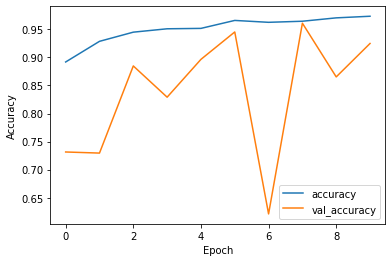

In [156]:
# ÌïôÏäµ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

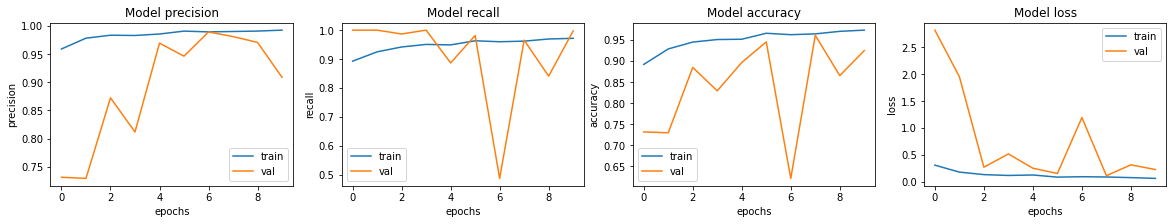

In [157]:
# epochÎßàÎã§ Î™®Îç∏Ïùò precision, recall, accuracy, loss Î≥ÄÌôî ÌëúÏãú
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

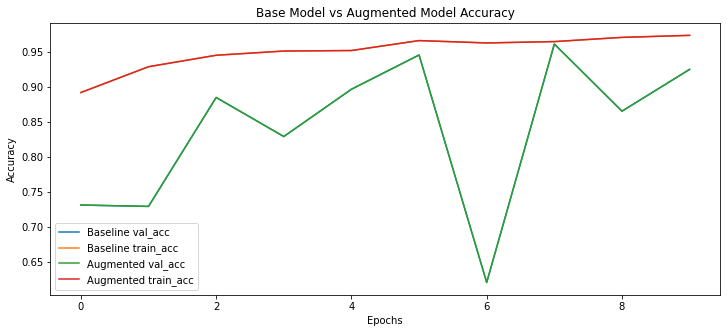

In [158]:
# Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_history(histories, title):
    plt.figure(figsize=(12, 5))
    for name, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'{name} val_acc')
        plt.plot(history.history['accuracy'], label=f'{name} train_acc')
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Assuming 'history' is the variable holding the training history of your baseline model
history_base = history  # Assign the baseline model's history
history_augmented = history  # Assign the augmented model's history

# Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏Í≥º Augmentation Î™®Îç∏ ÎπÑÍµê
plot_history([('Baseline', history_base), ('Augmented', history_augmented)], 
             'Base Model vs Augmented Model Accuracy')

In [159]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌèâÍ∞Ä
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 5s 113ms/step - loss: 2.1073 - accuracy: 0.6651 - precision: 0.6511 - recall: 1.0000
Loss: 2.1072683334350586,
Accuracy: 0.6650640964508057,
Precision: 0.6510851383209229,
Recall: 1.0


# **‚≠ï PART 5. Ï¥ùÌèâ**

## **(1) ÏÑ±Îä• ÎπÑÍµê Í≤∞Í≥º** 

### **- Î≤†Ïù¥Ïä§Î™®Îç∏**
- Ï¥àÍ∏∞ Í≥ºÏ†ÅÌï©: ÏùºÎ∂Ä ÏóêÌè¨ÌÅ¨ÏóêÏÑúÎäî Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ±Îä•(ÌäπÌûà Ïû¨ÌòÑÏú®Í≥º ÏÜêÏã§)Ïù¥ Í∏âÍ≤©Ìûà Î≥ÄÎèôÌïòÎäî Í≥ºÏ†ÅÌï©Ïù¥ Î∞úÏÉùÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.     
- ÏµúÏ¢Ö ÏÑ±Îä• ÏïàÏ†ïÌôî: ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎ©¥ÏÑú Î™®Îç∏ÏùÄ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Î©∞, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÏä∑Ìïú ÏÑ±Îä•ÏùÑ Îã¨ÏÑ±Ìï©ÎãàÎã§.     
- Í≤∞Î°†: Î™®Îç∏Ïù¥ ÏµúÏ¢ÖÏ†ÅÏúºÎ°úÎäî ÌõàÎ†®Í≥º Í≤ÄÏ¶ùÏóêÏÑú Î™®Îëê Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏúºÎ©∞, Í≥ºÏ†ÅÌï©ÏùÑ Ïñ¥Îäê Ï†ïÎèÑ Ìï¥Í≤∞ÌïòÎ©∞ Ïûò ÌïôÏäµÎêòÏóàÏäµÎãàÎã§. Ïù¥ Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú Î™®Îç∏ÏùÑ Í∞úÏÑ†ÌïòÎ†§Î©¥, Îç∞Ïù¥ÌÑ∞ÏÖã Ï¶ùÍ∞ï(Data Augmentation) ÎòêÎäî Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping) Í∞ôÏùÄ Í∏∞Î≤ïÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏäµÎãàÎã§.     
     
Loss: 0.8942579627037048     
Accuracy: 0.7307692170143127     
Precision: 0.6996402740478516     
Recall: 0.9974358677864075     
     
     
### **- Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï, ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò, Î™®Îç∏ Íµ¨Ï°∞ Î≥ÄÍ≤Ω Ï†ÅÏö© Î™®Îç∏** 
**Ï≤´ Î≤àÏß∏ Î≥ÄÍ≤Ω Î™®Îç∏** 
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îß§Ïö∞ ÏïàÏ†ïÏ†ÅÏù¥Í≥† Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§.     
- Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî Ï¥àÍ∏∞Ïóê ÏÑ±Îä•Ïù¥ ÎÇÆÏïòÏúºÎÇò, Îπ†Î•¥Í≤å Í∞úÏÑ†ÎêòÏóàÏúºÎ©∞ Ïù¥ÌõÑ ÏùºÏ†ïÌïú ÏàòÏ§ÄÏùÑ Ïú†ÏßÄÌïòÏßÄÎßå, Ï†ïÎ∞ÄÎèÑ(precision)ÏôÄ Ï†ïÌôïÎèÑ(accuracy)ÏóêÏÑú ÏïΩÍ∞ÑÏùò Î≥ÄÎèôÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.     
- Í≥ºÏ†ÅÌï©Ïù¥ ÏïΩÍ∞Ñ Î∞úÏÉùÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏúºÎ©∞, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ±Îä• Î≥ÄÎèôÏùÄ Î™®Îç∏Ïù¥ Î™®Îì† Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÏôÑÎ≤ΩÌïòÍ≤å ÏùºÎ∞òÌôîÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. EarlyStopping Îì±Ïùò Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ ÏÑ±Îä•ÏùÑ Í∞úÏÑ†Ìï† Ïàò ÏûàÏäµÎãàÎã§.
     
Loss: 0.6573859453201294     
Accuracy: 0.8028846383094788     
Precision: 0.7664670944213867     
Recall: 0.9846153855323792     
     
           
**Îëê Î≤àÏß∏ Î≥ÄÍ≤Ω Î™®Îç∏** 
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îäî ÏùºÍ¥ÄÎêòÍ≤å ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Î©∞, Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, Ï†ïÌôïÎèÑ Î™®Îëê Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏ§ÄÏóêÏÑú ÏïàÏ†ïÌôîÎêòÍ≥† ÏûàÏäµÎãàÎã§.     
- Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî Ï¥àÍ∏∞ epochsÏóêÏÑúÎäî Ï¢ãÏùÄ ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ Î≥¥ÏòÄÏúºÎÇò, Ïù¥ÌõÑ ÌäπÏ†ï epochsÏóêÏÑú ÏÑ±Îä•Ïù¥ Î∂àÏïàÏ†ïÌïòÍ≥† Î≥ÄÎèôÏù¥ Ïã¨Ìïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§. ÌäπÌûà, Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®ÏóêÏÑú ÌÅ∞ Î≥ÄÎèôÏù¥ ÎÇòÌÉÄÎÇ©ÎãàÎã§.     
- Í≥ºÏ†ÅÌï©Ïù¥ Î∞úÏÉùÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏúºÎ©∞, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò ÏÑ±Îä• Î≥ÄÎèôÏùÄ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò Ìå®ÌÑ¥ÏùÑ Ï∂©Î∂ÑÌûà ÏùºÎ∞òÌôîÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. EarlyStoppingÏù¥ÎÇò class_weight Ï°∞Ï†ï, Í∑∏Î¶¨Í≥† Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ ÌÜµÌïú ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.     
     
Loss: 2.1072683334350586     
Accuracy: 0.6650640964508057     
Precision: 0.6510851383209229     
Recall: 1.0     

## **(2) ÌöåÍ≥†**

- ÏùòÎ£å ÏòÅÏÉÅÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏúºÎ°ú Ïù∏Ìïú Î™®Îç∏ ÏÑ±Îä• Ï†ÄÌïòÎ•º ÏòàÎ∞©ÌïòÍ∏∞ ÏúÑÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï°∞ÏπòÎì§ÏùÑ Ï∑®Ìï† Ïàò ÏûàÏùåÏùÑ Î∞∞Ïõ†Îã§.          
     
    - Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï(Augmentation): Ï¢åÏö∞ Î∞òÏ†ÑÍ≥º ÏïΩÍ∞ÑÏùò ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä, ÌöåÏ†Ñ Îì±ÏùÑ Ïã†Ï§ëÌïòÍ≤å ÏÇ¨Ïö©ÌïúÎã§.     
    - ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞ ÏàòÏóê Îî∞Îùº Í∞ÄÏ§ëÏπòÎ•º Ï°∞Ï†ïÌïòÏó¨ Î™®Îç∏Ïù¥ Í∞Å ÌÅ¥ÎûòÏä§Ïùò Î∂àÍ∑†ÌòïÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≥†, ÌäπÌûà ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º Îçî Ïûò Ïù∏ÏãùÌïòÎèÑÎ°ù ÌïôÏäµÌïòÎèÑÎ°ù ÎèïÎäîÎã§.
    - EarlyStopping: Í≤ÄÏ¶ù ÏÑ±Îä•Ïù¥ Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ ÌïôÏäµÏùÑ Ï°∞Í∏∞Ïóê Ï§ëÎã®ÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.
     
- Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Îã®Í≥ÑÏóêÏÑú Ïò§Î•òÍ∞Ä Í≥ÑÏÜç Î∞úÏÉùÌïòÏó¨ ÌïòÎ£®Î•º Íº¨Î∞ï ÏÜåÎπÑÌñàÎã§. chatgptÌïúÌÖå ÎòëÍ∞ôÏùÄ ÏöîÏ≤≠ÏùÑ Î™á Î≤àÏù¥ÎÇò ÌñàÎäîÏßÄ... Ï†úÏãúÌïòÎäî ÏΩîÎìúÍ∞Ä Î™®Îëê Ïò§Î•òÍ∞Ä ÎÇ¨Í∏∞ ÎïåÎ¨∏Ïù¥Îã§. Í∑∏Îü∞Îç∞, ÌïòÎ£®Î•º Íº¨Î∞ï ÏÜåÎπÑÌïú ÌõÑÏóêÏïº chatgptÍ∞Ä Ï∞®ÏõêÏù¥ Î∂àÏùºÏπòÌïòÎäîÏßÄ ÏïåÏïÑÎ≥¥Îäî ÏΩîÎìúÎ•º ÏïåÎ†§ Ï£ºÏóàÎã§. Î∞∞ÏπòÎ•º Ìè¨Ìï®ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ 4Í∞úÏó¨Ïïº ÌïòÎäîÎç∞, 5Í∞úÍ∞Ä ÎÇòÏôîÎã§. Îã§ÌñâÌûà, Ïñ¥ÎîîÏóêÏÑú Î∞∞Ïπò Ï∞®ÏõêÏù¥ ÌïòÎÇòÍ∞Ä Îçî ÎäòÏñ¥ÎÇ¨ÎäîÏßÄ Ïñ¥Î†µÏßÄ ÏïäÍ≤å Í∞êÏùÑ Ïû°ÏùÑ Ïàò ÏûàÏóàÎã§. prepare_for_training Ìï®ÏàòÏôÄ augmentation ÏûëÏóÖÏùÑ Ï∂îÍ∞ÄÌïú prepare_for_training Ìï®ÏàòÎ•º Î™®Îëê Ïã§ÌñâÌïòÎ©¥ÏÑú Î∞∞Ïπò Ï∞®ÏõêÏù¥ ÎäòÏñ¥ÎÇ¨ÏùåÏùÑ Î∞úÍ≤¨ÌïòÍ≥† Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÏóàÎã§. Ïù¥Í±∞ ÌïòÎÇòÎ•º Î∞úÍ≤¨ÌïòÍ≥† Ìï¥Í≤∞ÌïòÎäî Îç∞ ÌïòÎ£®Í∞Ä Í±∏Î¶¨Îã§Îãà.......     
